<a href="https://colab.research.google.com/github/IAgroup19/AIProject/blob/main/TrabalhoMC906EmissaoCO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Dados

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import subprocess
import os
df = pd.read_csv("/content/gdrive/MyDrive/DadosTrabalhoIA/global-data-on-sustainable-energy (1).csv")
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [ ]:
df_emissions = pd.read_csv("/content/gdrive/MyDrive/DadosTrabalhoIA/annual-co-emissions-by-region.csv")
df_emissions

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
...,...,...,...,...
30303,Zimbabwe,ZWE,2018,10714598.0
30304,Zimbabwe,ZWE,2019,9775428.0
30305,Zimbabwe,ZWE,2020,7849639.0
30306,Zimbabwe,ZWE,2021,8396158.0


In [ ]:
df_emissions_br = df_emissions[(df_emissions['Entity']=='Brazil')]
df_emissions_br = df_emissions_br[(df_emissions_br['Year'] >= 2000 )]
df_emissions_br.drop(columns=['Entity', 'Code'], inplace=True)
df_emissions_br['Annual CO₂ emissions'] = df_emissions_br['Annual CO₂ emissions']/1000000
df_emissions_br.columns = ['Year', 'Annual_C02_emissio']
df_emissions_br

,Year,Annual_C02_emissio
4597,2000,340.18300
4598,2001,346.16598
4599,2002,347.76502
4600,2003,344.64500
4601,2004,361.43400
4602,2005,364.37100
4603,2006,368.87100
4604,2007,390.57300
4605,2008,412.63800
4606,2009,389.77500


 # Importando Bibliotecas

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
import plotly.graph_objects as go
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MaxAbsScaler
from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

# Carregando Dataset

In [ ]:
df.shape

(3649, 21)

In [ ]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [ ]:
df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [ ]:
df.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [ ]:
df["Entity"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Icelan

# Visualizando os Dados


## Geral

In [ ]:
# Dynamic world map with a slider
def plot_world_map_with_slider(column_name):
    fig = go.Figure()
    for year in range(2000, 2021):
        filtered_df = df[df['Year'] == year]
        trace = go.Choropleth(
            locations=filtered_df['Entity'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',
            colorbar=dict(title=column_name),
            zmin=df[column_name].min(),
            zmax=df[column_name].max(),
            visible=False
        )
        fig.add_trace(trace)

    fig.data[0].visible = True
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)
        )
        step['args'][0]['visible'][i] = True
        steps.append(step)

    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},
    )]

    fig.update_layout(
        title_text=f'{column_name} Map with slider',
        title_font_size=24,
        title_x=0.5,
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50),
    )
    fig.show()

# Example usage
column_name = 'Access to electricity (% of population)'
plot_world_map_with_slider(column_name)
column_name = 'Renewable energy share in the total final energy consumption (%)'
plot_world_map_with_slider(column_name)

In [ ]:
def EDA(var, base):
    df_var = pd.DataFrame(columns=[var, "Value_co2_emissions_kt_by_country"])
    i=0
    for field in list(base[var].unique()):
        base_field = base[(base[var]==field)]
        ratio = base_field['Value_co2_emissions_kt_by_country'].sum() / base['Value_co2_emissions_kt_by_country'].sum()
        df_var.loc[i] = (field, ratio*100)
        i += 1

    df_V = df_var.groupby(by=var, as_index=False).sum()
    sorted_df = df_V.sort_values("Value_co2_emissions_kt_by_country", ascending=False)
    return sorted_df

In [ ]:
def plot_EDA(var, base):
    df_var = EDA(var, base)

    if df_var.shape[0] > 18: #when de dataframe is too big to fit and remain clear in the plot
        df_var = df_var[(abs(df_var['Value_co2_emissions_kt_by_country']) > 1)] #just considering percents bigger than 1, the rest is irrelevant for visualize

    plt.figure(figsize=(13, 7))
    plt.xticks(rotation=90)
    splot=sns.barplot(x=var,y="Value_co2_emissions_kt_by_country",data=df_var, hue=var, palette ="crest")
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # coloca leganda para fora da area do grafico
    plt.xlabel(var, size=14)
    plt.ylabel("% Emissões de CO2", size=14)
    plt.title(f'Emissões de CO2 por {var}', size=14)

In [ ]:
df_var = EDA("Year", df)
df_var

,Year,Value_co2_emissions_kt_by_country
19,2019.0,5.750482
18,2018.0,5.746891
17,2017.0,5.623307
14,2014.0,5.599290
13,2013.0,5.590274
15,2015.0,5.556474
16,2016.0,5.556227
12,2012.0,5.455869
11,2011.0,5.376303
10,2010.0,5.213217


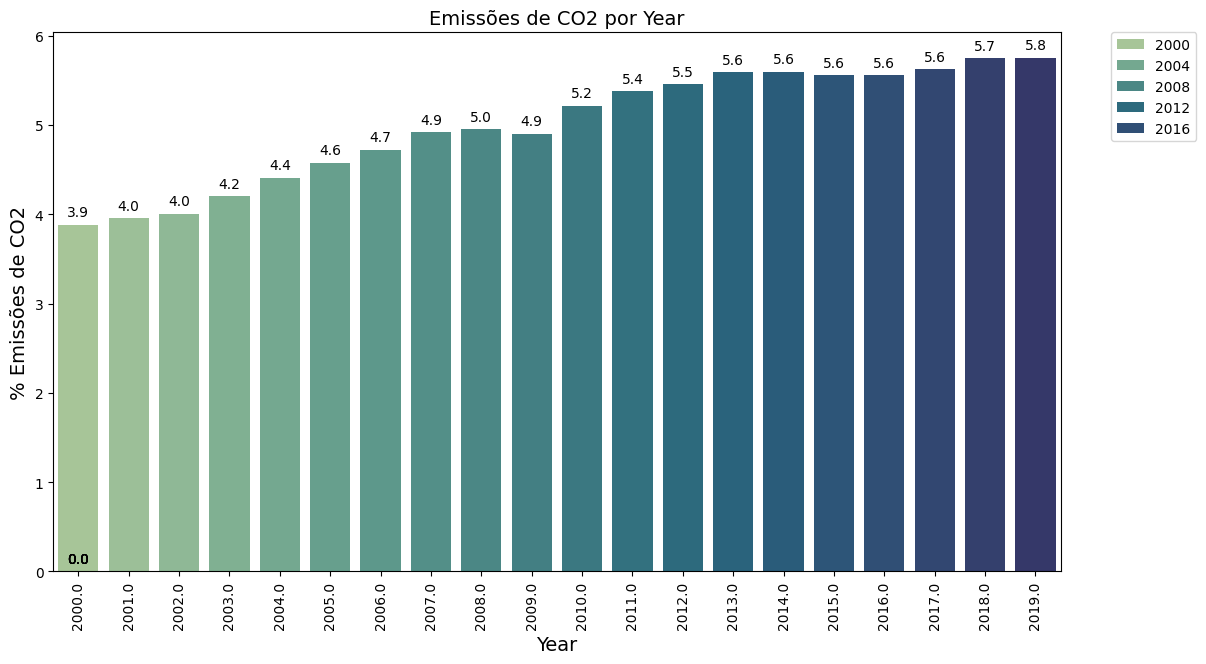

In [ ]:
plot_EDA("Year", df)

In [ ]:
df_var = EDA("Entity", df)
df_var

,Entity,Value_co2_emissions_kt_by_country
34,China,29.660903
169,United States,20.700056
74,India,6.346414
81,Japan,4.597653
62,Germany,3.004854
...,...,...
162,Turkey,0.000000
144,Slovakia,0.000000
48,Egypt,0.000000
129,Puerto Rico,0.000000


In [ ]:
df_var = EDA("Entity", df)
df_var

,Entity,Value_co2_emissions_kt_by_country
34,China,29.660903
169,United States,20.700056
74,India,6.346414
81,Japan,4.597653
62,Germany,3.004854
...,...,...
162,Turkey,0.000000
144,Slovakia,0.000000
48,Egypt,0.000000
129,Puerto Rico,0.000000


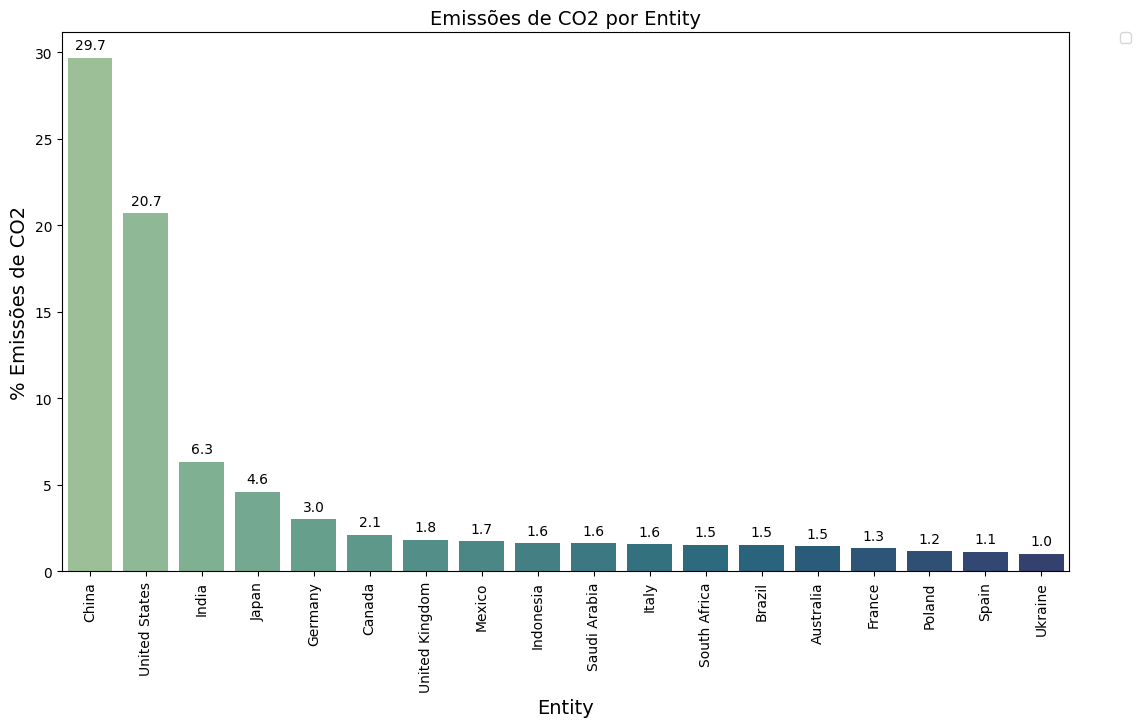

In [ ]:
plot_EDA("Entity", df)

In [ ]:
def EDA(var, base):
    df_var = pd.DataFrame(columns=[var, "Value_co2_emissions_kt_by_country"])
    i=0
    for field in list(base[var].unique()):
        base_field = base[(base[var]==field)]
        ratio = base_field['Value_co2_emissions_kt_by_country'].sum() / base['Value_co2_emissions_kt_by_country'].sum()
        df_var.loc[i] = (field, ratio*100)
        i += 1

    df_V = df_var.groupby(by=var, as_index=False).sum()
    sorted_df = df_V.sort_values("Value_co2_emissions_kt_by_country", ascending=False)
    return sorted_df

# Separando Brazil

In [ ]:
df_br = df[(df['Entity']=='Brazil')]
df_br = pd.merge(df_emissions_br, df_br, how='outer', on = ['Year'])
df_br.drop(columns=['Value_co2_emissions_kt_by_country'], inplace=True)
df_br

,Year,Annual_C02_emissio,Entity,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),...,Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,2000,340.18300,Brazil,94.391716,89.0,364.68,126500000.0,42.66,28.87,4.94,...,91.572780,13400.320,3.88,43.288433,4.387949,3749.910848,25,8515770.0,-14.235004,-51.92528
1,2001,346.16598,Brazil,96.016525,89.7,367.36,5290000.0,41.33,35.19,14.27,...,89.111000,12893.828,3.90,39.111620,1.389896,3160.249345,25,8515770.0,-14.235004,-51.92528
2,2002,347.76502,Brazil,96.652990,90.1,374.10,33350000.0,42.85,33.50,13.84,...,90.155460,13021.791,3.89,40.756653,3.053462,2839.491501,25,8515770.0,-14.235004,-51.92528
3,2003,344.64500,Brazil,96.980095,90.6,387.32,7530000.0,45.11,31.62,13.40,...,91.189750,13111.923,3.91,42.284126,1.140829,3070.436419,25,8515770.0,-14.235004,-51.92528
4,2004,361.43400,Brazil,96.765110,91.1,392.57,1140000.0,45.18,40.14,11.60,...,89.469260,13593.700,3.90,42.286156,5.759965,3637.313890,25,8515770.0,-14.235004,-51.92528
5,2005,364.37100,Brazil,97.093510,91.6,399.88,11720000.0,46.13,39.56,9.20,...,90.003030,13792.465,3.88,43.145700,3.202132,4790.456566,25,8515770.0,-14.235004,-51.92528
6,2006,368.87100,Brazil,97.594315,92.1,412.49,1220000.0,46.67,39.40,12.98,...,90.435270,14020.683,3.86,43.045963,3.961989,5886.391522,25,8515770.0,-14.235004,-51.92528
7,2007,390.57300,Brazil,98.125380,92.6,427.18,910000.0,47.19,37.64,11.65,...,91.390076,14770.351,3.84,44.380226,6.069871,7348.187963,25,8515770.0,-14.235004,-51.92528
8,2008,412.63800,Brazil,98.526630,93.1,432.21,19530000.0,47.04,55.87,13.21,...,87.712510,15255.087,3.86,43.366776,5.094195,8831.183643,25,8515770.0,-14.235004,-51.92528
9,2009,389.77500,Brazil,98.856940,93.6,438.04,174490000.0,48.92,36.32,12.22,...,92.081450,15004.240,3.74,46.308830,-0.125812,8597.794335,25,8515770.0,-14.235004,-51.92528


In [ ]:
df_br.shape

(23, 21)

In [ ]:
df_br.describe()

,Year,Annual_C02_emissio,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,23.00000,23.000000,21.000000,21.000000,21.000000,2.000000e+01,20.000000,21.000000,21.000000,21.000000,21.000000,21.000000,20.00000,21.000000,21.000000,21.000000,21.0,21.000000,2.100000e+01
mean,2011.00000,437.120497,98.399414,93.380952,487.051905,1.254390e+08,45.080000,66.559524,13.193333,405.307619,86.920219,15376.291333,3.89650,43.198424,2.119240,7882.134671,8515770.0,-14.235004,-5.192528e+01
std,6.78233,69.730336,1.562416,2.277854,107.605050,1.545355e+08,2.153773,34.034873,2.398029,73.344354,4.606918,1597.552694,0.08431,2.645003,3.095006,3381.465238,0.0,0.000000,7.280896e-15
min,2000.00000,340.183000,94.391716,89.000000,364.680000,9.100000e+05,41.330000,28.870000,4.940000,273.710000,76.527000,12893.828000,3.74000,38.852745,-4.059048,2839.491501,8515770.0,-14.235004,-5.192528e+01
25%,2005.50000,366.621000,97.093510,91.600000,399.880000,6.970000e+06,43.330000,37.640000,12.980000,346.960000,85.305340,13792.465000,3.85750,42.066370,1.140829,4790.456566,8515770.0,-14.235004,-5.192528e+01
50%,2011.00000,444.504320,98.856940,94.000000,457.600000,7.212000e+07,45.295000,55.870000,13.840000,428.810000,88.053566,15921.327000,3.88500,43.280678,1.921176,8710.063290,8515770.0,-14.235004,-5.192528e+01
75%,2016.50000,494.934690,99.700000,95.400000,550.890000,1.777825e+08,46.845000,90.910000,14.790000,462.320000,90.435270,16629.840000,3.93000,44.246536,3.974423,9928.675897,8515770.0,-14.235004,-5.192528e+01
max,2022.00000,557.901000,100.000000,95.900000,705.900000,5.216200e+08,48.920000,136.580000,15.170000,520.010000,92.081450,17519.043000,4.05000,49.471880,7.528226,13245.387370,8515770.0,-14.235004,-5.192528e+01


In [ ]:
df_br.isnull().sum()

Year                                                                0
Annual_C02_emissio                                                  0
Entity                                                              2
Access to electricity (% of population)                             2
Access to clean fuels for cooking                                   2
Renewable-electricity-generating-capacity-per-capita                2
Financial flows to developing countries (US $)                      3
Renewable energy share in the total final energy consumption (%)    3
Electricity from fossil fuels (TWh)                                 2
Electricity from nuclear (TWh)                                      2
Electricity from renewables (TWh)                                   2
Low-carbon electricity (% electricity)                              2
Primary energy consumption per capita (kWh/person)                  2
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         3
Renewables (% equiva

In [ ]:
##valores faltantes
#acesso a energia ja esta em 100 em 2020 (vamos considerar deixar em 100?)

df_br.at[21, 'Density\\n(P/Km2)'] = 25
df_br.at[21, 'Access to electricity (% of population)'] = 100


df_br.at[21, 'Renewable energy share in the total final energy consumption (%)'] = 77.4
df_br.at[21, 'Primary energy consumption per capita (kWh/person)'] = (5.708 * 10e11) / (2.143 * 10e8)
df_br.at[21, 'Electricity from nuclear (TWh)'] = 14.43
df_br.at[21, 'Electricity from fossil fuels (TWh)'] = 129.25
df_br.at[21, 'Low-carbon electricity (% electricity)'] = 69.6
df_br.at[21, 'gdp_growth'] = 4.8
df_br.at[21, 'gdp_per_capita'] = 7696.78
df_br.at[21, 'Electricity from renewables (TWh)'] = 531.17
df_br.at[21, 'Access to clean fuels for cooking'] = 96.5

##agora 2022
df_br.at[22, 'Density\\n(P/Km2)'] = 25
df_br.at[22, 'Access to electricity (% of population)'] = 100


df_br.at[22, 'Renewable energy share in the total final energy consumption (%)'] = 87.7
df_br.at[22, 'Primary energy consumption per capita (kWh/person)'] = (6.771 * 10e11) / (2.153 * 10e8)
df_br.at[22, 'Electricity from nuclear (TWh)'] = 14.21
df_br.at[22, 'Electricity from fossil fuels (TWh)'] = 83.3
df_br.at[22, 'Low-carbon electricity (% electricity)'] = 75.6
df_br.at[22, 'gdp_growth'] = 2.9
df_br.at[22, 'gdp_per_capita'] = 8917.67

df_br.at[22, 'Electricity from renewables (TWh)'] = 551.16
df_br.at[22, 'Access to clean fuels for cooking'] = 96.7





In [ ]:
df_br.drop(columns=['Entity', 'Land Area(Km2)', 'Latitude', 'Longitude', 'Density\\n(P/Km2)'], inplace = True)

# Tratamento de Dados

In [ ]:
# Filtering numerical data
numeric_data = df_br.select_dtypes(include='number')
# Filtering categorical data
categorical_data = df_br.select_dtypes(exclude='number')

In [ ]:
# Describe dataset and show missing values
df_info = df_br.describe().transpose()
missing_values = df_br.isna().sum()

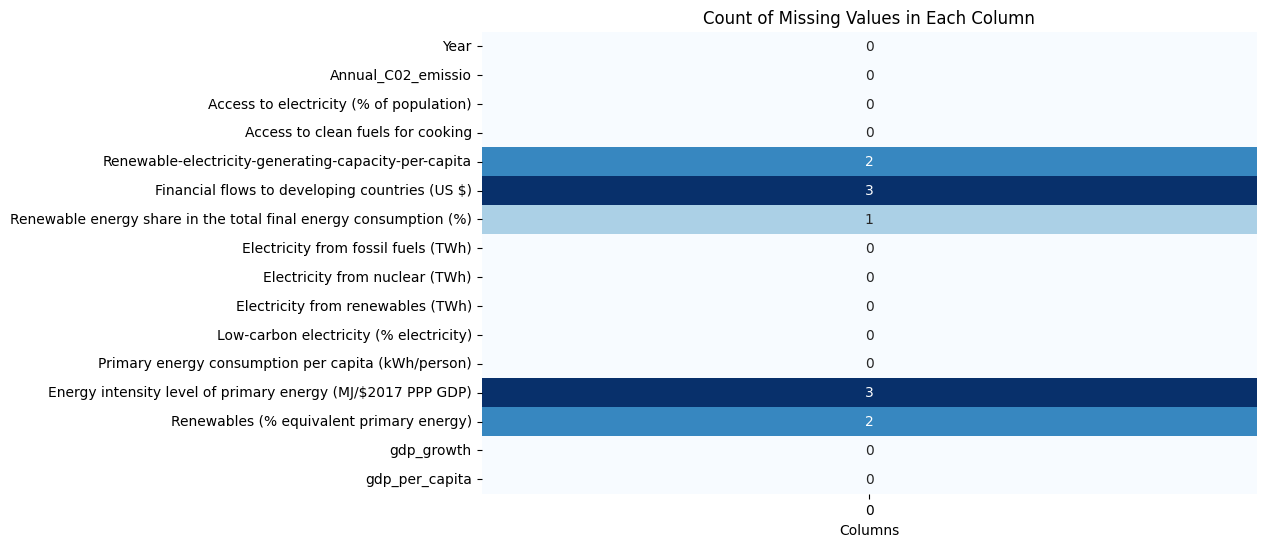

In [ ]:
# Create a heatmap
fig_missing_values = plt.figure(figsize=(10, 6))
sns.heatmap(missing_values.to_frame(), cmap='Blues', annot=True, fmt='d', cbar=False)
# Customize the chart
plt.title('Count of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('')
# Display the chart
plt.show()

In [ ]:
# # Drop columns with a high number of missing values
# df.drop(columns=['Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)',
#                  'Renewable-electricity-generating-capacity-per-capita'], inplace=True)

In [ ]:
media_var = df_br['Renewable energy share in the total final energy consumption (%)'].mean()
df_br['Renewable energy share in the total final energy consumption (%)'].fillna(media_var, inplace = True)

In [ ]:
media_var = df_br['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean()
df_br['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(media_var, inplace=True)

In [ ]:
media_var = df_br['Financial flows to developing countries (US $)'].mean()
df_br['Financial flows to developing countries (US $)'].fillna(media_var, inplace=True)

In [ ]:
df_br

,Year,Annual_C02_emissio,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita
0,2000,340.18300,94.391716,89.0,364.68,126500000.0,42.66,28.87,4.94,308.77,91.572780,13400.320000,3.88,43.288433,4.387949,3749.910848
1,2001,346.16598,96.016525,89.7,367.36,5290000.0,41.33,35.19,14.27,273.71,89.111000,12893.828000,3.90,39.111620,1.389896,3160.249345
2,2002,347.76502,96.652990,90.1,374.10,33350000.0,42.85,33.50,13.84,292.95,90.155460,13021.791000,3.89,40.756653,3.053462,2839.491501
3,2003,344.64500,96.980095,90.6,387.32,7530000.0,45.11,31.62,13.40,313.88,91.189750,13111.923000,3.91,42.284126,1.140829,3070.436419
4,2004,361.43400,96.765110,91.1,392.57,1140000.0,45.18,40.14,11.60,329.43,89.469260,13593.700000,3.90,42.286156,5.759965,3637.313890
5,2005,364.37100,97.093510,91.6,399.88,11720000.0,46.13,39.56,9.20,346.96,90.003030,13792.465000,3.88,43.145700,3.202132,4790.456566
6,2006,368.87100,97.594315,92.1,412.49,1220000.0,46.67,39.40,12.98,359.55,90.435270,14020.683000,3.86,43.045963,3.961989,5886.391522
7,2007,390.57300,98.125380,92.6,427.18,910000.0,47.19,37.64,11.65,387.88,91.390076,14770.351000,3.84,44.380226,6.069871,7348.187963
8,2008,412.63800,98.526630,93.1,432.21,19530000.0,47.04,55.87,13.21,385.61,87.712510,15255.087000,3.86,43.366776,5.094195,8831.183643
9,2009,389.77500,98.856940,93.6,438.04,174490000.0,48.92,36.32,12.22,410.13,92.081450,15004.240000,3.74,46.308830,-0.125812,8597.794335


In [ ]:
df_br[:22]

,Year,Annual_C02_emissio,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita
0,2000,340.18300,94.391716,89.0,42.66,28.87,4.94,308.77,91.572780,13400.320000,3.8800,4.387949,3749.910848
1,2001,346.16598,96.016525,89.7,41.33,35.19,14.27,273.71,89.111000,12893.828000,3.9000,1.389896,3160.249345
2,2002,347.76502,96.652990,90.1,42.85,33.50,13.84,292.95,90.155460,13021.791000,3.8900,3.053462,2839.491501
3,2003,344.64500,96.980095,90.6,45.11,31.62,13.40,313.88,91.189750,13111.923000,3.9100,1.140829,3070.436419
4,2004,361.43400,96.765110,91.1,45.18,40.14,11.60,329.43,89.469260,13593.700000,3.9000,5.759965,3637.313890
5,2005,364.37100,97.093510,91.6,46.13,39.56,9.20,346.96,90.003030,13792.465000,3.8800,3.202132,4790.456566
6,2006,368.87100,97.594315,92.1,46.67,39.40,12.98,359.55,90.435270,14020.683000,3.8600,3.961989,5886.391522
7,2007,390.57300,98.125380,92.6,47.19,37.64,11.65,387.88,91.390076,14770.351000,3.8400,6.069871,7348.187963
8,2008,412.63800,98.526630,93.1,47.04,55.87,13.21,385.61,87.712510,15255.087000,3.8600,5.094195,8831.183643
9,2009,389.77500,98.856940,93.6,48.92,36.32,12.22,410.13,92.081450,15004.240000,3.7400,-0.125812,8597.794335


In [ ]:
df_br_original_ate_2021 = df_br[:22].copy()
df_br_original = df_br.copy()

df_br_original = pd.concat([df_br_original, pd.DataFrame([{'Year':2022}])], ignore_index = True)
df_br_original = pd.concat([df_br_original, pd.DataFrame([{'Year':2023}])], ignore_index = True)
df_br_original = pd.concat([df_br_original, pd.DataFrame([{'Year':2024}])], ignore_index = True)
df_br_original = pd.concat([df_br_original, pd.DataFrame([{'Year':2025}])], ignore_index = True)
df_br_original

,Year,Annual_C02_emissio,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita
0,2000,340.18300,94.391716,89.0,42.66,28.87,4.94,308.77,91.572780,13400.320000,3.8800,4.387949,3749.910848
1,2001,346.16598,96.016525,89.7,41.33,35.19,14.27,273.71,89.111000,12893.828000,3.9000,1.389896,3160.249345
2,2002,347.76502,96.652990,90.1,42.85,33.50,13.84,292.95,90.155460,13021.791000,3.8900,3.053462,2839.491501
3,2003,344.64500,96.980095,90.6,45.11,31.62,13.40,313.88,91.189750,13111.923000,3.9100,1.140829,3070.436419
4,2004,361.43400,96.765110,91.1,45.18,40.14,11.60,329.43,89.469260,13593.700000,3.9000,5.759965,3637.313890
5,2005,364.37100,97.093510,91.6,46.13,39.56,9.20,346.96,90.003030,13792.465000,3.8800,3.202132,4790.456566
6,2006,368.87100,97.594315,92.1,46.67,39.40,12.98,359.55,90.435270,14020.683000,3.8600,3.961989,5886.391522
7,2007,390.57300,98.125380,92.6,47.19,37.64,11.65,387.88,91.390076,14770.351000,3.8400,6.069871,7348.187963
8,2008,412.63800,98.526630,93.1,47.04,55.87,13.21,385.61,87.712510,15255.087000,3.8600,5.094195,8831.183643
9,2009,389.77500,98.856940,93.6,48.92,36.32,12.22,410.13,92.081450,15004.240000,3.7400,-0.125812,8597.794335


In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_br['Annual_C02_emissio'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -1.476031
p-value: 0.545333


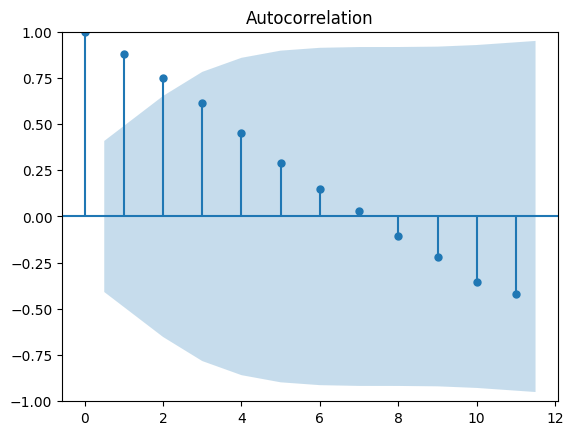

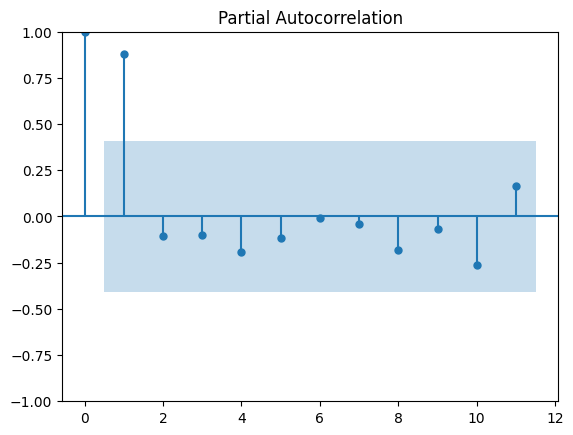

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_br['Annual_C02_emissio'])
plot_pacf(df_br['Annual_C02_emissio'])
plt.show()

In [ ]:
target = df_br['Annual_C02_emissio']

In [ ]:
target_2020_2022 = target[20:]
target_2020_2022

20    444.50432
21    497.20634
22    483.47730
Name: Annual_C02_emissio, dtype: float64

In [ ]:
target = target.drop([22])

In [ ]:
df_br.drop(columns=['Annual_C02_emissio'], inplace = True)

In [ ]:
df_br_2020 = df_br[df_br["Year"]== 2020]
df_br_2020.dropna()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita
20,2020,100.0,95.9,45.08,81.15,13.21,520.01,86.79134,15921.327,3.8965,-4.059048,6796.844542


In [ ]:
df_br_2020

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita
20,2020,100.0,95.9,45.08,81.15,13.21,520.01,86.79134,15921.327,3.8965,-4.059048,6796.844542


In [ ]:
df_br_2021 = df_br[df_br["Year"]== 2021]
df_br_2021.dropna()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita
21,2021,100.0,96.5,77.4,129.25,14.43,531.17,69.6,2663.555763,3.8965,4.8,7696.78


In [ ]:
df_br_2021

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita
21,2021,100.0,96.5,77.4,129.25,14.43,531.17,69.6,2663.555763,3.8965,4.8,7696.78


In [ ]:
df_br_2022 = df_br[df_br["Year"]== 2022]
df_br_2022

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita
22,2022,100.0,96.7,87.7,83.3,14.21,551.16,75.6,3144.914073,3.8965,2.9,8917.67


In [ ]:
df_br = df_br.drop([22])

In [ ]:
df_br

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita
0,2000,94.391716,89.0,42.66,28.87,4.94,308.77,91.572780,13400.320000,3.8800,4.387949,3749.910848
1,2001,96.016525,89.7,41.33,35.19,14.27,273.71,89.111000,12893.828000,3.9000,1.389896,3160.249345
2,2002,96.652990,90.1,42.85,33.50,13.84,292.95,90.155460,13021.791000,3.8900,3.053462,2839.491501
3,2003,96.980095,90.6,45.11,31.62,13.40,313.88,91.189750,13111.923000,3.9100,1.140829,3070.436419
4,2004,96.765110,91.1,45.18,40.14,11.60,329.43,89.469260,13593.700000,3.9000,5.759965,3637.313890
5,2005,97.093510,91.6,46.13,39.56,9.20,346.96,90.003030,13792.465000,3.8800,3.202132,4790.456566
6,2006,97.594315,92.1,46.67,39.40,12.98,359.55,90.435270,14020.683000,3.8600,3.961989,5886.391522
7,2007,98.125380,92.6,47.19,37.64,11.65,387.88,91.390076,14770.351000,3.8400,6.069871,7348.187963
8,2008,98.526630,93.1,47.04,55.87,13.21,385.61,87.712510,15255.087000,3.8600,5.094195,8831.183643
9,2009,98.856940,93.6,48.92,36.32,12.22,410.13,92.081450,15004.240000,3.7400,-0.125812,8597.794335


In [ ]:
# Check for duplicate rows
num_duplicates = df_br.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


In [ ]:
df_br.shape

(22, 12)

In [ ]:
numeric_df = df_br.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
# Display the correlation matrix
print(correlation_matrix)

                                                        Year  \
Year                                                1.000000   
Annual_C02_emissio                                  0.822133   
Access to electricity (% of population)             0.917924   
Access to clean fuels for cooking                   0.973319   
Renewable-electricity-generating-capacity-per-c...  0.960834   
Financial flows to developing countries (US $)      0.538900   
Renewable energy share in the total final energ...  0.557592   
Electricity from fossil fuels (TWh)                 0.799125   
Electricity from nuclear (TWh)                      0.572432   
Electricity from renewables (TWh)                   0.970401   
Low-carbon electricity (% electricity)             -0.737725   
Primary energy consumption per capita (kWh/person) -0.152184   
Energy intensity level of primary energy (MJ/$2...  0.411000   
Renewables (% equivalent primary energy)            0.440357   
gdp_growth                              

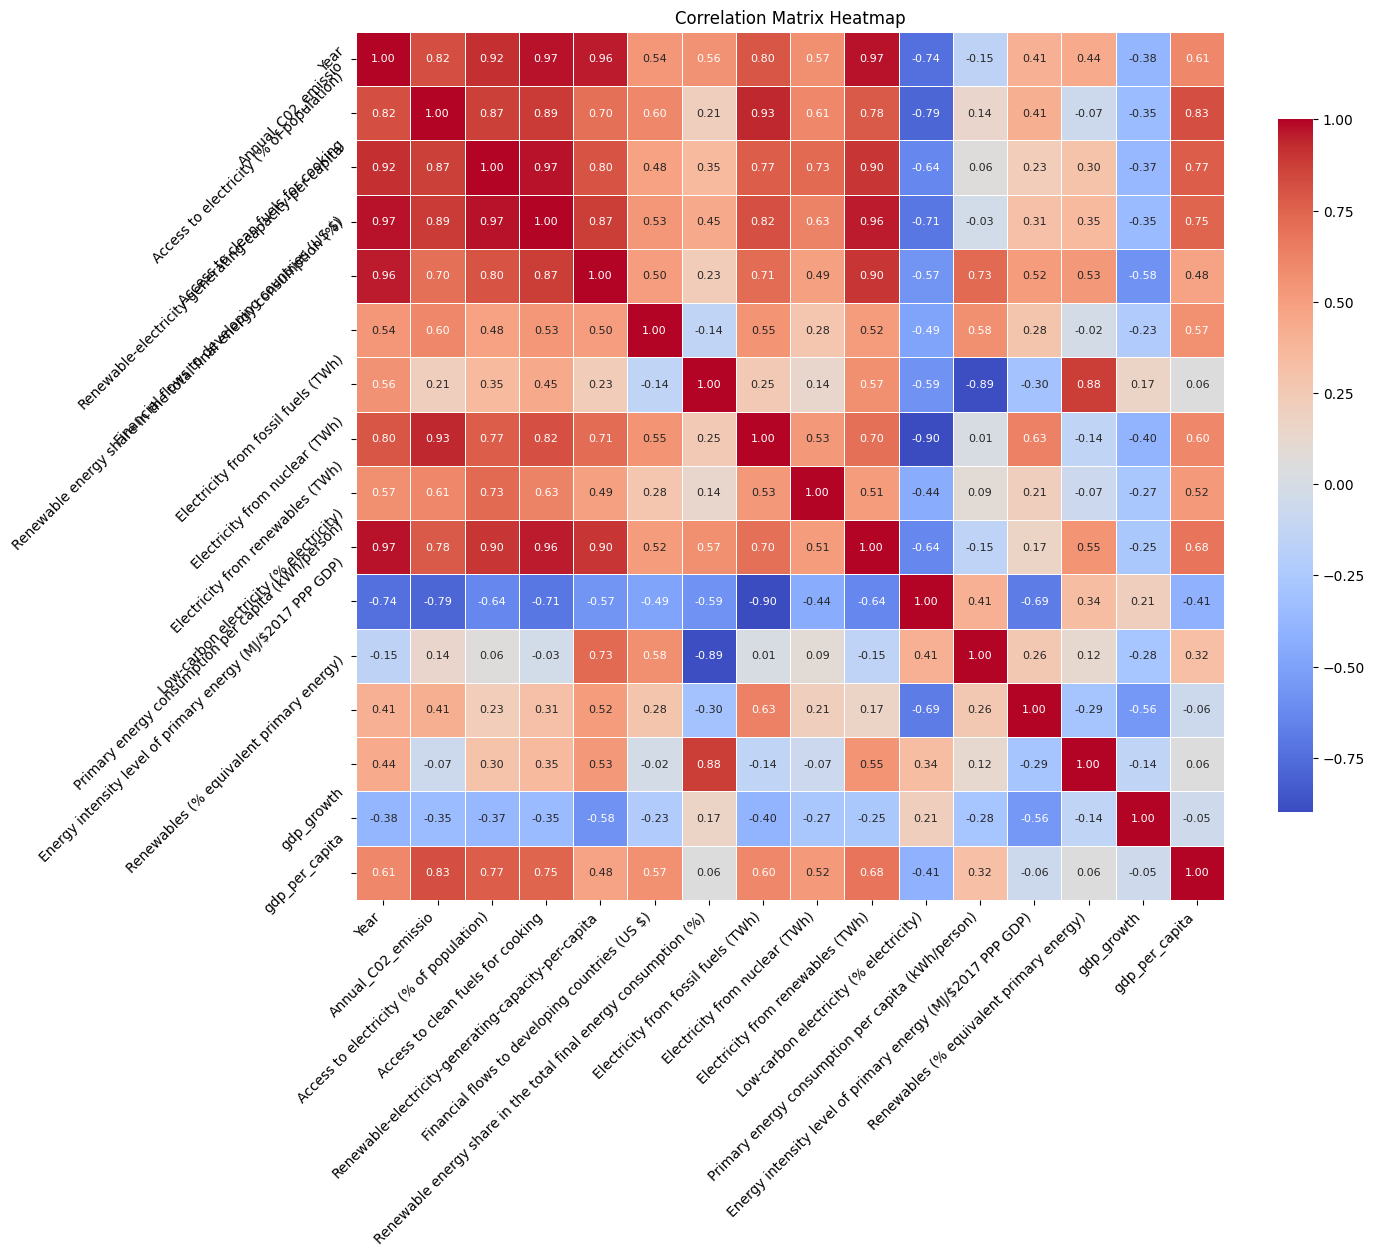

In [ ]:
# Increase the figure size for a clearer heatmap
plt.figure(figsize=(14, 12))
# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
            cbar_kws={"shrink": .75}, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
            annot_kws={"size": 8}, square=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Scoring

In [ ]:
col = ['Algorithm', 'r2 score', 'accuracy', 'MAE', 'MSE', 'Ano']
df_results = pd.DataFrame(columns=col)

In [ ]:
col = ['Algorithm', 'accuracy', 'MAE', 'MSE', 'Ano']
df_results_2022 = pd.DataFrame(columns=col)

In [ ]:
def scoring(model, str_model, test_features, test_labels, i, ano):
    if str_model != 'arima':
      predictions = model.predict(test_features)
      mae = mean_absolute_error(test_labels, predictions)
      mse = mean_squared_error(test_labels, predictions)
      r2 = r2_score(test_labels, predictions)
      errors = abs(predictions - test_labels)
      mape = 100 * np.mean(errors / test_labels)
      accuracy = 100 - mape
      print('Model Performance')
      print('Mean Absolute Error: {:0.4f}.'.format(mae))
      print('Mean Squared Error: {:0.4f}.'.format(mse))
      print('R^2 Score = {:0.4f}.'.format(r2))
      print('Accuracy = {:0.2f}%.'.format(accuracy))
      df_results.loc[i] = [str_model, round(r2, 5), round(accuracy, 5), round(mae, 5),  round(mse, 5), ano]

    else:
      test_forecast = model.get_forecast(steps=len(test_labels))
      test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test_labels.index)

      mae = mean_absolute_error(test_labels['Annual_C02_emissio'], test_forecast_series)
      mse = mean_squared_error(test_labels['Annual_C02_emissio'], test_forecast_series)
      r2 = r2_score(test_labels['Annual_C02_emissio'], test_forecast_series)
      errors = abs(test_forecast_series - test_labels['Annual_C02_emissio'])
      mape = 100 * np.mean(errors / test_labels['Annual_C02_emissio'])
      accuracy = 100 - mape
      print('Model Performance')
      print('Mean Absolute Error: {:0.4f}.'.format(mae))
      print('Mean Squared Error: {:0.4f}.'.format(mse))
      print('R^2 Score = {:0.4f}.'.format(r2))
      print('Accuracy = {:0.2f}%.'.format(accuracy))
      df_results.loc[i] = [str_model, round(r2, 5), round(accuracy, 5), round(mae, 5),  round(mse, 5), ano]

# Split Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_br,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
df_br

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita
0,2000,94.391716,89.0,42.66,28.87,4.94,308.77,91.572780,13400.320000,3.8800,4.387949,3749.910848
1,2001,96.016525,89.7,41.33,35.19,14.27,273.71,89.111000,12893.828000,3.9000,1.389896,3160.249345
2,2002,96.652990,90.1,42.85,33.50,13.84,292.95,90.155460,13021.791000,3.8900,3.053462,2839.491501
3,2003,96.980095,90.6,45.11,31.62,13.40,313.88,91.189750,13111.923000,3.9100,1.140829,3070.436419
4,2004,96.765110,91.1,45.18,40.14,11.60,329.43,89.469260,13593.700000,3.9000,5.759965,3637.313890
5,2005,97.093510,91.6,46.13,39.56,9.20,346.96,90.003030,13792.465000,3.8800,3.202132,4790.456566
6,2006,97.594315,92.1,46.67,39.40,12.98,359.55,90.435270,14020.683000,3.8600,3.961989,5886.391522
7,2007,98.125380,92.6,47.19,37.64,11.65,387.88,91.390076,14770.351000,3.8400,6.069871,7348.187963
8,2008,98.526630,93.1,47.04,55.87,13.21,385.61,87.712510,15255.087000,3.8600,5.094195,8831.183643
9,2009,98.856940,93.6,48.92,36.32,12.22,410.13,92.081450,15004.240000,3.7400,-0.125812,8597.794335


In [ ]:
X_train.shape

(16, 12)

In [ ]:
Y_train.shape

(16,)

# Testes de Modelos

## Linear Regression

In [ ]:
lm = LinearRegression()
LinearRegression_model = lm.fit(X_train, Y_train)
Y_pred_LM = lm.predict(X_test)

scoring(LinearRegression_model, LinearRegression_model, X_test, Y_test, 0, '-')

Model Performance
Mean Absolute Error: 29.5462.
Mean Squared Error: 1967.1455.
R^2 Score = 0.7017.
Accuracy = 92.13%.


In [ ]:
Y_pred_2020_LM = lm.predict(df_br_2020)
Y_pred_2020_LM

array([447.34900594])

In [ ]:
Y_pred_2021_LM = lm.predict(df_br_2021)
Y_pred_2021_LM

array([497.07712967])

In [ ]:
Y_pred_2022_LM = lm.predict(df_br_2022)
Y_pred_2022_LM

array([519.12682228])

In [ ]:
target_2020_2022

20    444.50432
21    497.20634
22    483.47730
Name: Annual_C02_emissio, dtype: float64

In [ ]:
Y_actual = [target_2020_2022.iloc[2]]
predictions = Y_pred_2022_LM
# mae = np.subtract(Y_actual,predictions)
# mse = np.square(np.subtract(Y_actual,predictions))
mae = mean_absolute_error(Y_actual,predictions)
mse = mean_squared_error(Y_actual,predictions)
errors = abs(predictions - Y_actual)
mape = 100 * np.mean(errors / Y_actual)
accuracy = 100 - mape
print('Model Performance')
print('Mean Absolute Error: {:0.4f}.'.format(mae))
print('Mean Squared Error: {:0.4f}.'.format(mse))
print('Accuracy = {:0.2f}%.'.format(accuracy))
df_results_2022.loc[0] = ['LinearRegression', round(accuracy, 5), round(mae, 5),  round(mse, 5), '2022']

Model Performance
Mean Absolute Error: 35.6495.
Mean Squared Error: 1270.8884.
Accuracy = 92.63%.


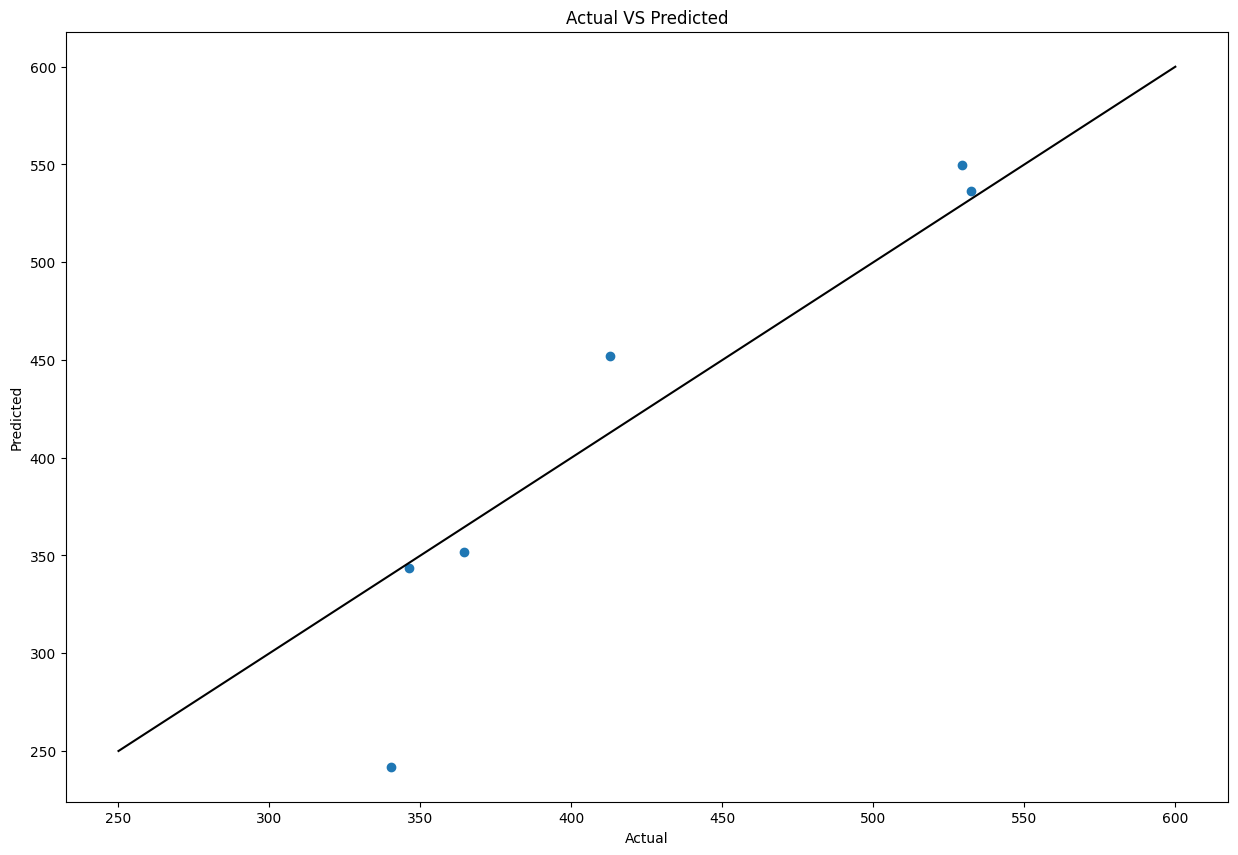

In [ ]:
# Plotandoo valor real de Emissões de CO2 VS o que o modelo preveu.
plt.figure(figsize=(15,10))
plt.scatter(Y_test, Y_pred_LM)
plt.title("Actual VS Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Plotando a linha y = x que indica o que seria ideal
x = np.linspace(250,600,100)
y = x
plt.plot(x, y, '-k', label='y=x')

In [ ]:
Y_pred_LM

array([241.95398007, 536.50351082, 452.03978303, 343.60182562,
       549.96110271, 351.98257423])

In [ ]:
Y_test

0     340.18300
13    532.41802
8     412.63800
1     346.16598
15    529.35302
5     364.37100
Name: Annual_C02_emissio, dtype: float64

In [ ]:
df_results

,Algorithm,r2 score,accuracy,MAE,MSE,Ano
0,LinearRegression(),0.70167,92.12913,29.54616,1967.14553,-


## KNN

In [ ]:
# Create a KNN regression model
knn_model = KNeighborsRegressor()

# Fit the model
knn_model.fit(X_train, Y_train)

# Make predictions
predictions_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(Y_test, predictions_knn)
mae_knn = mean_absolute_error(Y_test, predictions_knn)
r2_knn = r2_score(Y_test, predictions_knn)

# Print evaluation metrics
# print(f"Model: {type(knn_model).__name__}, mse: {mse_knn}")
# print(f"Model: {type(knn_model).__name__}, mae: {mae_knn}")
# print(f"Model: {type(knn_model).__name__}, r2: {r2_knn}")


scoring(knn_model, 'KNN', X_test, Y_test, 1, '-')
# Y_test

Model Performance
Mean Absolute Error: 29.5445.
Mean Squared Error: 1250.5265.
R^2 Score = 0.8103.
Accuracy = 93.45%.


In [ ]:
Y_actual = [target_2020_2022.iloc[2]]
predictions = knn_model.predict(df_br_2022)
# mae = np.subtract(Y_actual,predictions)
# mse = np.square(np.subtract(Y_actual,predictions))
mae = mean_absolute_error(Y_actual,predictions)
mse = mean_squared_error(Y_actual,predictions)
errors = abs(predictions - Y_actual)
mape = 100 * np.mean(errors / Y_actual)
accuracy = 100 - mape
print('Model Performance')
print('Mean Absolute Error: {:0.4f}.'.format(mae))
print('Mean Squared Error: {:0.4f}.'.format(mse))
print('Accuracy = {:0.2f}%.'.format(accuracy))
df_results_2022.loc[1] = ['KNN', round(accuracy, 5), round(mae, 5),  round(mse, 5), '2022']

Model Performance
Mean Absolute Error: 99.4930.
Mean Squared Error: 9898.8626.
Accuracy = 79.42%.


## XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
model_xgb = xgb.XGBRegressor()

In [ ]:
model_xgb.fit(X_train, Y_train)

y_pred_xgb = model_xgb.predict(X_test)

In [ ]:
scoring(model_xgb, 'xgb.XGBRegressor()', X_test, Y_test, 2, '-')

Model Performance
Mean Absolute Error: 27.2519.
Mean Squared Error: 992.5881.
R^2 Score = 0.8495.
Accuracy = 93.00%.


In [ ]:
Y_pred_XGB_2022 = model_xgb.predict(df_br_2022)
Y_pred_XGB_2022

array([478.8053], dtype=float32)

In [ ]:
Y_actual = [target_2020_2022.iloc[2]]
predictions = Y_pred_XGB_2022
# mae = np.subtract(Y_actual,predictions)
# mse = np.square(np.subtract(Y_actual,predictions))
mae = mean_absolute_error(Y_actual,predictions)
mse = mean_squared_error(Y_actual,predictions)
errors = abs(predictions - Y_actual)
mape = 100 * np.mean(errors / Y_actual)
accuracy = 100 - mape
print('Model Performance')
print('Mean Absolute Error: {:0.4f}.'.format(mae))
print('Mean Squared Error: {:0.4f}.'.format(mse))
print('Accuracy = {:0.2f}%.'.format(accuracy))
df_results_2022.loc[2] = ['XGBoost', round(accuracy, 5), round(mae, 5),  round(mse, 5), '2022']

Model Performance
Mean Absolute Error: 4.6720.
Mean Squared Error: 21.8276.
Accuracy = 99.03%.


In [ ]:
df_results

,Algorithm,r2 score,accuracy,MAE,MSE,Ano
0,LinearRegression(),0.70167,92.12913,29.54616,1967.14553,-
1,KNN,0.81035,93.44611,29.54448,1250.52653,-
2,xgb.XGBRegressor(),0.84947,92.99543,27.25191,992.58814,-


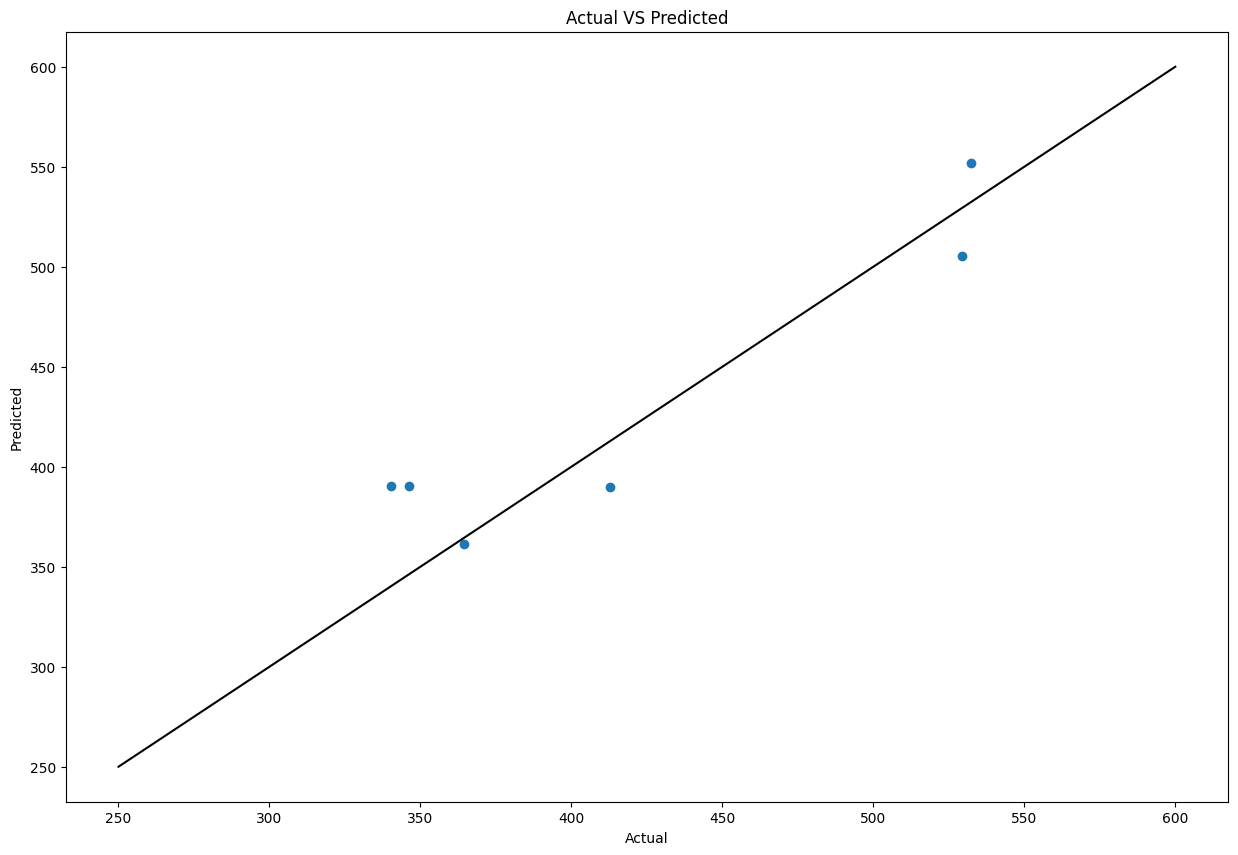

In [ ]:
# Plotandoo valor real de Emissões de CO2 VS o que o modelo preveu.
plt.figure(figsize=(15,10))
plt.scatter(Y_test, y_pred_xgb)
plt.title("Actual VS Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Plotando a linha y = x que indica o que seria ideal
x = np.linspace(250,600,100)
y = x
plt.plot(x, y, '-k', label='y=x')

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Treinar o modelo
rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
importances = rf.feature_importances_

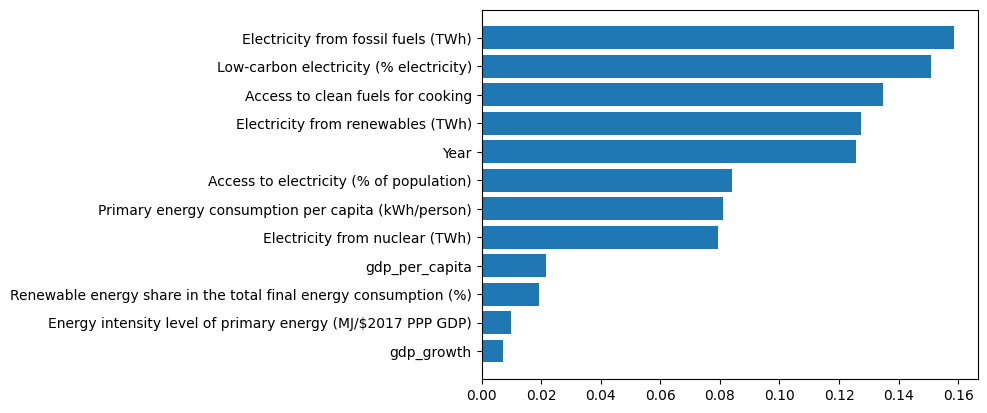

In [ ]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [ ]:
scoring(rf, 'RandomForestRegressor()', X_test, Y_test, 3, '-')

Model Performance
Mean Absolute Error: 14.7445.
Mean Squared Error: 279.4438.
R^2 Score = 0.9576.
Accuracy = 96.52%.


In [ ]:
predictions_2020 = rf.predict(df_br_2020)
predictions_2020

array([453.0240968])

In [ ]:
predictions_2021 = rf.predict(df_br_2021)
predictions_2021

array([486.7019234])

In [ ]:
predictions_2022 = rf.predict(df_br_2022)
predictions_2022

array([479.1875076])

In [ ]:
Y_actual = [target_2020_2022.iloc[2]]
predictions = predictions_2022
# mae = np.subtract(Y_actual,predictions)
# mse = np.square(np.subtract(Y_actual,predictions))
mae = mean_absolute_error(Y_actual,predictions)
mse = mean_squared_error(Y_actual,predictions)
errors = abs(predictions - Y_actual)
mape = 100 * np.mean(errors / Y_actual)
accuracy = 100 - mape
print('Model Performance')
print('Mean Absolute Error: {:0.4f}.'.format(mae))
print('Mean Squared Error: {:0.4f}.'.format(mse))
print('Accuracy = {:0.2f}%.'.format(accuracy))
df_results_2022.loc[3] = ['RandomForest', round(accuracy, 5), round(mae, 5),  round(mse, 5), '2022']

Model Performance
Mean Absolute Error: 4.2898.
Mean Squared Error: 18.4023.
Accuracy = 99.11%.


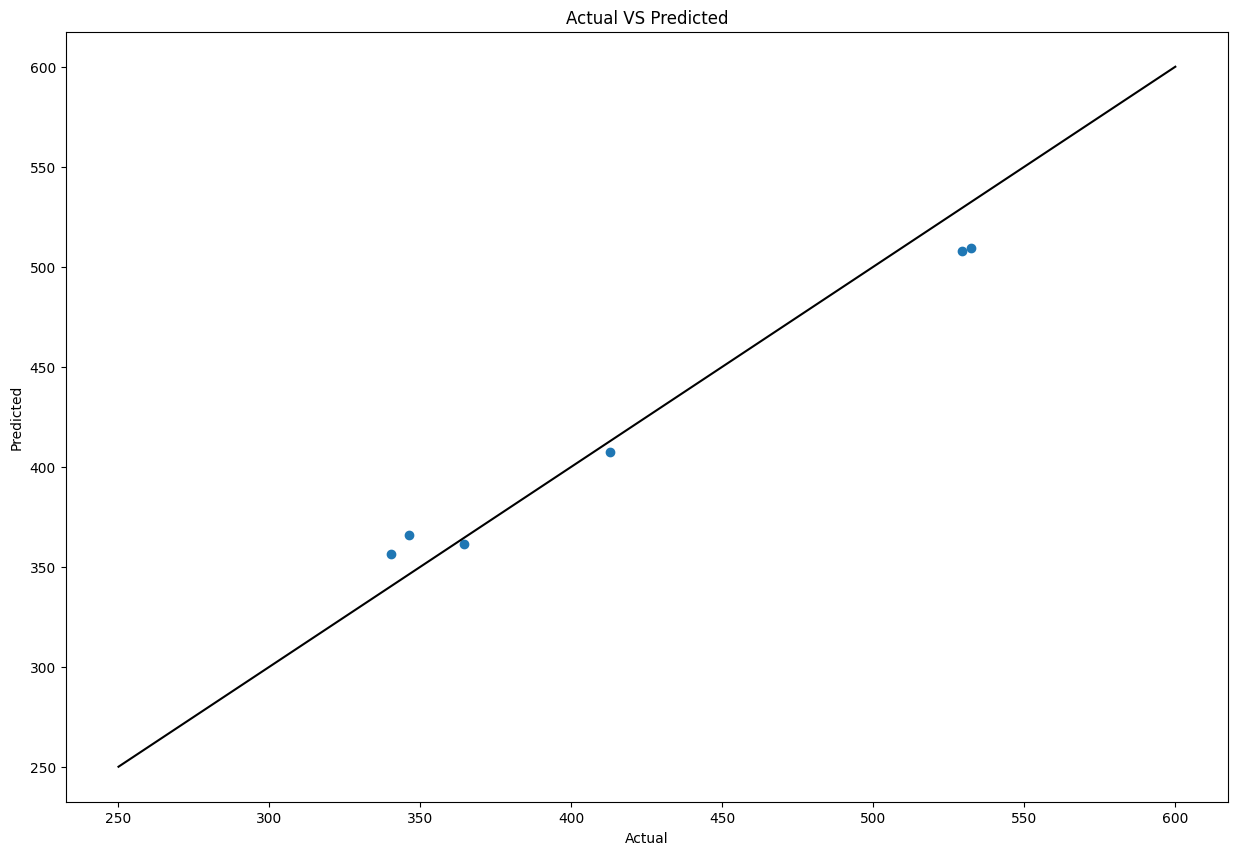

In [ ]:
# Plotandoo valor real de Emissões de CO2 VS o que o modelo preveu.
plt.figure(figsize=(15,10))
plt.scatter(Y_test, y_pred_rf)
plt.title("Actual VS Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Plotando a linha y = x que indica o que seria ideal
x = np.linspace(250,600,100)
y = x
plt.plot(x, y, '-k', label='y=x')

# Arima

In [ ]:
!pip install pmdarima

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm


data_actual = df_br_original_ate_2021['Annual_C02_emissio']

seasonal = False

# use pmdarima to automatically select best ARIMA model
model = pm.auto_arima(data_actual,
                      m=12,               # frequency of series
                      seasonal=seasonal,  # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=0, # minimum p and q
                      max_p=12, max_q=12, # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

# print model summary
print(model.summary())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning:

m (12) set for non-seasonal fit. Setting to 0



Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=200.786, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=197.516, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=198.885, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=198.864, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=195.571, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=196.909, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.964 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. O

In [ ]:
from datetime import date
from dateutil.relativedelta import relativedelta

def convert_to_date(x):
    return date(1,12,31) + relativedelta(years=x-1)

In [ ]:
df_br_original_ate_2021['Year'] = df_br_original_ate_2021['Year'].apply(convert_to_date)
df_br_original['Year'] = df_br_original['Year'].apply(convert_to_date)

In [ ]:
df_arima = df_br_original.copy()

In [ ]:
df_arima = df_arima.set_index('Year')
df_arima

,Annual_C02_emissio
Year,
2000-12-31,340.18300
2001-12-31,346.16598
2002-12-31,347.76502
2003-12-31,344.64500
2004-12-31,361.43400
2005-12-31,364.37100
2006-12-31,368.87100
2007-12-31,390.57300
2008-12-31,412.63800


In [ ]:
df_arima.drop(columns=['Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'gdp_growth', 'gdp_per_capita'], inplace=True)
df_arima

,Year,Annual_C02_emissio
0,2000-12-31,340.18300
1,2001-12-31,346.16598
2,2002-12-31,347.76502
3,2003-12-31,344.64500
4,2004-12-31,361.43400
5,2005-12-31,364.37100
6,2006-12-31,368.87100
7,2007-12-31,390.57300
8,2008-12-31,412.63800
9,2009-12-31,389.77500


In [ ]:
stepwise= pm.auto_arima(df_arima,
                    start_p=0,
                    start_q=0,
                    d=0,
                    max_p=6,
                    max_q=6,
                    max_d=2,
                    start_P=1,
                    start_Q=1,
                    D=1,
                    max_P=2, max_D=1, max_Q=2, max_order=5,
                    m=12,
                    seasonal=False,
                    trace=True,
                    error_action='ignore',suppress_warnings=True,
                    stepwise=True)
stepwise
print(stepwise.aic())
print(stepwise.bic())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning:

m (12) set for non-seasonal fit. Setting to 0



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=332.296, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=217.053, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=218.436, Time=0.33 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=220.107, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=214.883, Time=0.45 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=235.419, Time=0.38 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=213.211, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=252.730, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=214.707, Time=0.43 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec

Best 

In [ ]:
df_arima

,Annual_C02_emissio
Year,
2000-12-31,340.18300
2001-12-31,346.16598
2002-12-31,347.76502
2003-12-31,344.64500
2004-12-31,361.43400
2005-12-31,364.37100
2006-12-31,368.87100
2007-12-31,390.57300
2008-12-31,412.63800


In [ ]:
treino=df_arima.iloc[:22]
teste=df_arima.iloc[22]

In [ ]:
treino

,Annual_C02_emissio
Year,
2000-12-31,340.18300
2001-12-31,346.16598
2002-12-31,347.76502
2003-12-31,344.64500
2004-12-31,361.43400
2005-12-31,364.37100
2006-12-31,368.87100
2007-12-31,390.57300
2008-12-31,412.63800


In [ ]:
model_fit = stepwise.fit(treino)
previsao=stepwise.predict(n_periods=4)

In [ ]:
previsao=pd.DataFrame(previsao,index=teste.index, columns=['previsão modelo 1'])

In [ ]:
previsao

2022-12-31    492.714026
2023-12-31    488.503624
2024-12-31    484.557444
2025-12-31    480.858902
Freq: A-DEC, dtype: float64

<Figure size 2000x500 with 0 Axes>

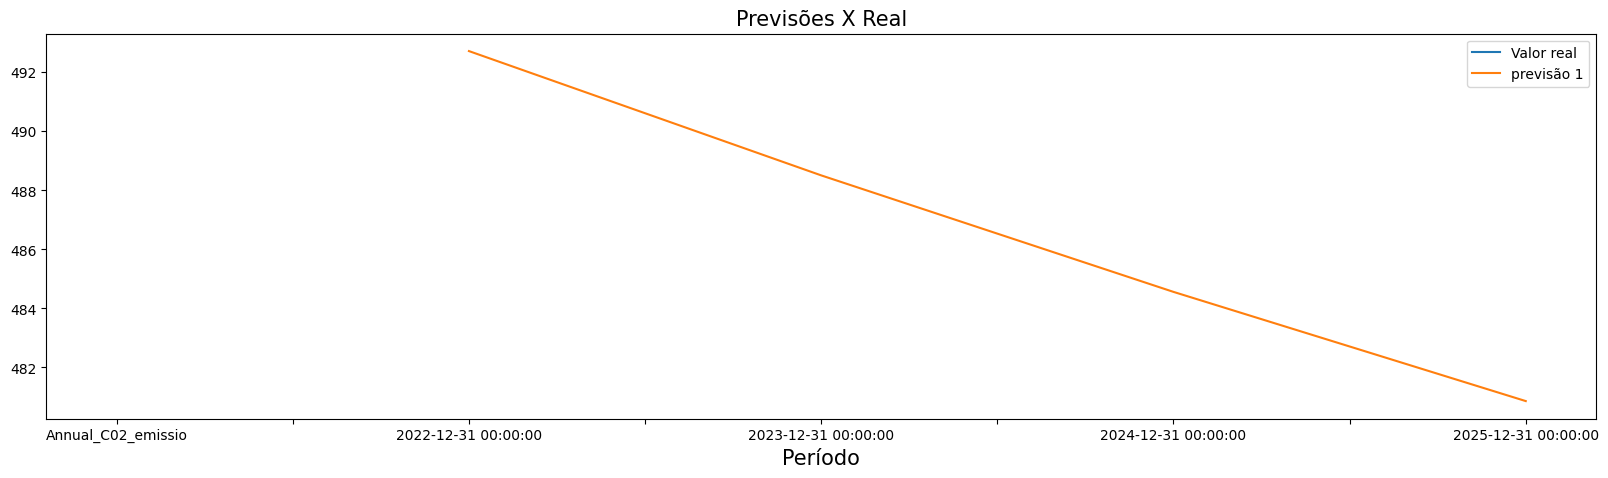

In [ ]:
plt.figure(figsize=(20,5))
pd.concat([teste,previsao],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.xlabel("Período", size=15)
plt.legend(['Valor real','previsão 1','previsão 2']);

In [ ]:
model = ARIMA(df_br_original_ate_2021['Annual_C02_emissio'], order=(1, 2, 1))
model_fit = model.fit()
forecast = model_fit.get_forecast(steps=3)


TypeError: ARIMA.fit() missing 1 required positional argument: 'y'

In [ ]:
df_br_original_ate_2021

,Year,Annual_C02_emissio,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita
0,2000-12-31,340.18300,94.391716,89.0,42.66,28.87,4.94,308.77,91.572780,13400.320000,3.8800,4.387949,3749.910848
1,2001-12-31,346.16598,96.016525,89.7,41.33,35.19,14.27,273.71,89.111000,12893.828000,3.9000,1.389896,3160.249345
2,2002-12-31,347.76502,96.652990,90.1,42.85,33.50,13.84,292.95,90.155460,13021.791000,3.8900,3.053462,2839.491501
3,2003-12-31,344.64500,96.980095,90.6,45.11,31.62,13.40,313.88,91.189750,13111.923000,3.9100,1.140829,3070.436419
4,2004-12-31,361.43400,96.765110,91.1,45.18,40.14,11.60,329.43,89.469260,13593.700000,3.9000,5.759965,3637.313890
5,2005-12-31,364.37100,97.093510,91.6,46.13,39.56,9.20,346.96,90.003030,13792.465000,3.8800,3.202132,4790.456566
6,2006-12-31,368.87100,97.594315,92.1,46.67,39.40,12.98,359.55,90.435270,14020.683000,3.8600,3.961989,5886.391522
7,2007-12-31,390.57300,98.125380,92.6,47.19,37.64,11.65,387.88,91.390076,14770.351000,3.8400,6.069871,7348.187963
8,2008-12-31,412.63800,98.526630,93.1,47.04,55.87,13.21,385.61,87.712510,15255.087000,3.8600,5.094195,8831.183643
9,2009-12-31,389.77500,98.856940,93.6,48.92,36.32,12.22,410.13,92.081450,15004.240000,3.7400,-0.125812,8597.794335


In [ ]:
df_br_original[21:]

,Year,Annual_C02_emissio,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita
21,2021-12-31,497.20634,100.0,96.5,77.4,129.25,14.43,531.17,69.6,2663.555763,3.8965,4.8,7696.78
22,2022-12-31,483.47730,100.0,96.7,87.7,83.30,14.21,551.16,75.6,3144.914073,3.8965,2.9,8917.67
23,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2023-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,2024-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,2025-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


22    511.395067
23    520.124196
24    528.079379
25    535.924848
26           NaN
Name: predicted_mean, dtype: float64


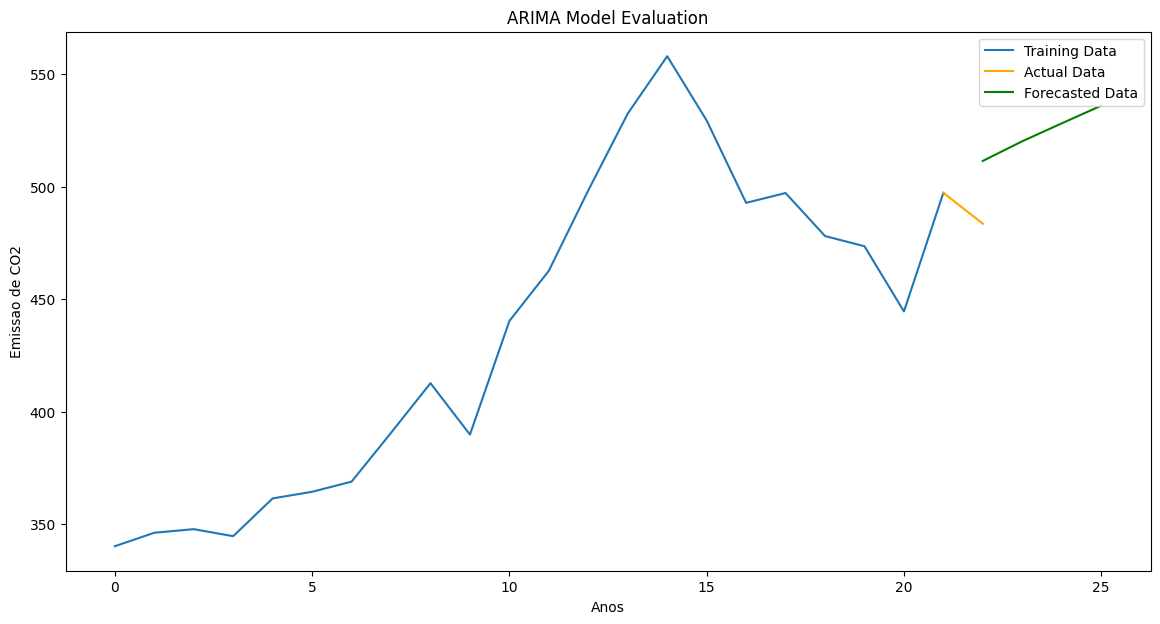

RMSE: 27.91776675466292


In [ ]:
# test_forecast = model_fit.get_forecast(steps=len(df_br_original[21:]))
test_forecast = model_fit.get_forecast(steps=4)
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=df_br_original[22:].index)
print(test_forecast_series)

# Calculate the mean squared error
mse = mean_squared_error([df_br_original.iloc[22]['Annual_C02_emissio']], [test_forecast_series.iloc[0]])
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(df_br_original_ate_2021['Annual_C02_emissio'], label='Training Data')
plt.plot(df_br_original[21:]['Annual_C02_emissio'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
# plt.fill_between(df_br_original[21:].index,
#                  test_forecast.conf_int().iloc[:, 0],
#                  test_forecast.conf_int().iloc[:, 1],
#                  color='k', alpha)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Anos')
plt.ylabel('Emissao de CO2')
plt.legend()
plt.show()

print('RMSE:', rmse)

In [ ]:
test_forecast_series

22    504.664444
23    537.189402
24    555.826367
25    582.157810
26           NaN
Name: predicted_mean, dtype: float64

In [ ]:
df_results

,Algorithm,r2 score,accuracy,MAE,MSE,Ano
0,LinearRegression(),0.70167,92.12913,29.54616,1967.14553,-
1,KNN,0.81035,93.44611,29.54448,1250.52653,-
2,xgb.XGBRegressor(),0.84947,92.99543,27.25191,992.58814,-
3,RandomForestRegressor(),0.95762,96.52412,14.74446,279.44378,-


In [ ]:
df_results_2022

,Algorithm,accuracy,MAE,MSE,Ano
0,LinearRegression,92.62643,35.64952,1270.88844,2022
1,KNN,79.42137,99.49303,9898.86262,2022
2,XGBoost,99.03367,4.67200,21.82760,2022
3,RandomForest,99.11272,4.28979,18.40232,2022


### Previsão

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Build Model
model = ARIMA(df_br_original_ate_2021['Annual_C02_emissio'], order=(2,1,1))
model_fit = model.fit()

# Forecast future values
steps = 4
forecast = model_fit.forecast(steps=steps)
print(forecast)

22    496.334085
23    510.310389
24    504.843536
25    510.513244
Name: predicted_mean, dtype: float64


In [ ]:
[target_2020_2022.iloc[2]]

[483.4773]

In [ ]:
[forecast.iloc[0]]

[504.6644440193156]

In [ ]:
Y_actual = [target_2020_2022.iloc[2]]
predictions = [forecast.iloc[0]]
# mae = np.subtract(Y_actual,predictions)
# mse = np.square(np.subtract(Y_actual,predictions))
mae = mean_absolute_error(Y_actual,predictions)
mse = mean_squared_error(Y_actual,predictions)
errors = abs(predictions[0] - Y_actual[0])
mape = 100 * np.mean(errors / Y_actual)
accuracy = 100 - mape
print('Model Performance')
print('Mean Absolute Error: {:0.4f}.'.format(mae))
print('Mean Squared Error: {:0.4f}.'.format(mse))
print('Accuracy = {:0.2f}%.'.format(accuracy))
df_results_2022.loc[4] = ['ARIMA', round(accuracy, 5), round(mae, 5),  round(mse, 5), '2022']

Model Performance
Mean Absolute Error: 21.1871.
Mean Squared Error: 448.8951.
Accuracy = 95.62%.


In [ ]:
df_results_2022

,Algorithm,accuracy,MAE,MSE,Ano
0,LinearRegression,92.62643,35.64952,1270.88844,2022
1,KNN,79.42137,99.49303,9898.86262,2022
2,XGBoost,99.03367,4.67200,21.82760,2022
3,RandomForest,99.11272,4.28979,18.40232,2022
4,ARIMA,95.61776,21.18714,448.89507,2022


# HyperParameters Tuning

In [ ]:
# Set hyperparameters possibilities for tuning Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
rf_max_depth.append(None)
rf_max_features = ['auto', 'sqrt', 'log2']
rf_criterion = ['squared_error', 'absolute_error']
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]
rf_min_impurity_decrease = [0.0, 0.05, 0.1]
rf_bootstrap = [True, False]

# Create the grid
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}

rf_grid

{'n_estimators': [200, 400, 600, 800, 1000],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'criterion': ['squared_error', 'absolute_error'],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_impurity_decrease': [0.0, 0.05, 0.1],
 'bootstrap': [True, False]}

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# # Tune the Random Forest Model
# rf_base = RandomForestRegressor()
# rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid,
#                                n_iter = 200, cv = 3, verbose = 2, random_state = 42,
#                                n_jobs = -1)

# rf_random.fit(X_train, Y_train)

# rf_random.best_estimator_

In [ ]:
rf_final = RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=5,
                      max_features=1.0, min_impurity_decrease=0.05,
                      n_estimators=600)
rf_final.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=5,
                      min_impurity_decrease=0.05, n_estimators=600)

In [ ]:
predictions = rf_final.predict(X_test)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)
errors = abs(predictions - Y_test)
mape = 100 * np.mean(errors / Y_test)
accuracy = 100 - mape
print('Model Performance')
print('Mean Absolute Error: {:0.4f}.'.format(mae))
print('Mean Squared Error: {:0.4f}.'.format(mse))
print('R^2 Score = {:0.4f}.'.format(r2))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
Mean Absolute Error: 9.3690.
Mean Squared Error: 131.4576.
R^2 Score = 0.9801.
Accuracy = 97.84%.


In [ ]:
# params = { 'max_depth': [3,6,10],
#            'learning_rate': [0.01, 0.05, 0.1],
#            'n_estimators': [100, 500, 1000],
#            'colsample_bytree': [0.3, 0.7]}
# xgbr = xgb.XGBRegressor(seed = 20)
# clf = GridSearchCV(estimator=xgbr,
#                    param_grid=params,
#                    scoring='neg_mean_squared_error',
#                    verbose=1)
# clf.fit(X_train, Y_train)
# print("Best parameters:", clf.best_params_)
# print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

In [ ]:
# best_grid = clf.best_estimator_
# print(best_grid)

In [ ]:
xgb_final = XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None)

xgb_final.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = xgb_final.predict(X_test)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)
errors = abs(predictions - Y_test)
mape = 100 * np.mean(errors / Y_test)
accuracy = 100 - mape
print('Model Performance')
print('Mean Absolute Error: {:0.4f}.'.format(mae))
print('Mean Squared Error: {:0.4f}.'.format(mse))
print('R^2 Score = {:0.4f}.'.format(r2))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
Mean Absolute Error: 9.8411.
Mean Squared Error: 135.1350.
R^2 Score = 0.9795.
Accuracy = 97.60%.


#### Ambos hyperparameters tuning do Random Forest e XGBoost tiveram desempenhos piores do que os originais

# Cross Validation

In [ ]:
# Define a function that compares the CV perfromance of a set of predetrmined models
def cv_comparison(models, X, y, cv):
    cv_accuracies = pd.DataFrame()
    maes = []
    mses = []
    r2s = []
    accs = []

    # Loop through the models, run a CV, add the average scores to the DataFrame and the scores of all CVs to the list
    for model in models:
        mae = -np.round(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv), 5)
        maes.append(mae)
        mae_avg = round(mae.mean(), 5)
        mse = -np.round(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv), 5)
        mses.append(mse)
        mse_avg = round(mse.mean(), 5)
        r2 = np.round(cross_val_score(model, X, y, scoring='r2', cv=cv), 5)
        r2s.append(r2)
        r2_avg = round(r2.mean(), 5)
        acc = np.round((100 - (100 * (mae * len(X))) / sum(y)), 5)
        accs.append(acc)
        acc_avg = round(acc.mean(), 5)
        cv_accuracies[str(model)] = [mae_avg, mse_avg, r2_avg, acc_avg]
    cv_accuracies.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return cv_accuracies, maes, mses, r2s, accs

In [ ]:
# Create the models to be tested
mlr_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
xgb_reg = xgb_regressor = xgb.XGBRegressor(random_state=42)

models = [mlr_reg, rf_reg, xgb_reg]

# Run the Cross-Validation comparison with the models used in this analysis
comp, maes, mses, r2s, accs = cv_comparison(models, X_train, Y_train, 4)

comp

,LinearRegression(),RandomForestRegressor(random_state=42),"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=42, ...)"
Mean Absolute Error,86.04620,21.33052,25.28743
Mean Squared Error,56521.89086,792.40444,884.19715
R^2,-28.16522,-1.21778,-1.73373
Accuracy,80.45838,95.15570,94.25707


In [ ]:
# Run the Cross-Validation comparison with the models used in this analysis
comp, maes, mses, r2s, accs = cv_comparison(models, X_train, Y_train, 5)

comp

,LinearRegression(),RandomForestRegressor(random_state=42),"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=42, ...)"
Mean Absolute Error,216.55220,18.85294,24.71498
Mean Squared Error,226767.39771,678.07189,1014.93513
R^2,-148.34024,0.19039,-0.59353
Accuracy,50.81967,95.71838,94.38708


In [ ]:
# Run the Cross-Validation comparison with the models used in this analysis
comp, maes, mses, r2s, accs = cv_comparison(models, X_train, Y_train, 6)

comp

,LinearRegression(),RandomForestRegressor(random_state=42),"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=42, ...)"
Mean Absolute Error,119.98715,18.83479,22.58662
Mean Squared Error,125662.35918,702.83948,818.56076
R^2,-48.26575,0.77982,0.75325
Accuracy,72.75019,95.72251,94.87044


In [ ]:
# Run the Cross-Validation comparison with the models used in this analysis
comp, maes, mses, r2s, accs = cv_comparison(models, X_train, Y_train, 7)

comp

,LinearRegression(),RandomForestRegressor(random_state=42),"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=42, ...)"
Mean Absolute Error,192.24712,17.77960,19.79907
Mean Squared Error,356017.13215,620.36669,698.63401
R^2,-125.24865,0.58787,0.49726
Accuracy,56.33951,95.96215,95.50351


In [ ]:
# Run the Cross-Validation comparison with the models used in this analysis
comp, maes, mses, r2s, accs = cv_comparison(models, X_train, Y_train, 8)

comp

,LinearRegression(),RandomForestRegressor(random_state=42),"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=42, ...)"
Mean Absolute Error,174.57564,17.91265,19.55479
Mean Squared Error,311944.55066,595.19094,737.68895
R^2,-1208.71345,-134.68379,-247.38988
Accuracy,60.35281,95.93193,95.55899
